In [229]:
# Tous les imports du notebook, cellule à exécuter dès le début
from math import sqrt
from random import shuffle
import matplotlib.pyplot as plt
import csv

# Algorithme des k plus proches voisins 
## Application : classification des Iris.

En 1936, Edgar Anderson a collecté des données sur 3 espèces d'iris : "iris setosa", "iris virginica" et "iris versicolor" 
our chaque iris étudié, Anderson a mesuré (en cm) :
- la largeur des sépales
- la longueur des sépales
- la largeur des pétales
- la longueur des pétales

<figure style="display: inline-block;">
    <img src="./Images/Iris_setosa.jpg" alt="alt text" width="200px">
     <figcaption>Iris setosa</figcaption>
</figure>
<figure style="display: inline-block;">
    <img src="./Images/Iris_virginica.jpg" alt="alt text" width="200px">
     <figcaption>Iris virginica</figcaption>
</figure>
<figure style="display: inline-block;">
    <img src="./Images/iris_versicolor.jpg" alt="alt text" width="200px">
     <figcaption>Iris versicolor</figcaption>
</figure>
<figure style="display: inline-block;">
    <img src="./Images/iris_petal_sepal.png" alt="alt text" width="200px">
     <figcaption>Diverses mesures</figcaption>
</figure>



Les données sont ici stockées dans un fichier au format `.csv` , dont voici les deux premières lignes :

    5.1,3.5,1.4,0.2,Iris-setosa
    4.9,3.0,1.4,0.2,Iris-setosa
    
Chaque ligne de données est composée des descripteurs et d'une étiquette (l'espèce de l'iris) , séparés par une virgule. 


Pour chacun de ces individus on dispose des champs :
```
- longueur_sepale : longueur des sépales  

- largeur_sepale  : largeur des sépales  

- longueur_petale : longueur des pétales  

- largeur_petale  : largeur des pétales  

- espece          : 'Iris-setosa', 'Irid_virginica' ou 'Iris-versicolor'
```

### Durant ce TP, vous allez chercher à déterminer les espèce d'iris à partir des mesures des pétales et sépales.

On va donc chercher, à partir des quatre descripteurs longueur_sepale, largeur_sepale, longueur_petale et largeur_petale, à effectuer une prédiction de l'étiquette espece.

<div class = "alert alert-warning">

#### Exercice 1:
<img src='./Images/extrait_jeu_donnees_iris.png' style='float:right;' width=500>

1. Ouvrir le fichier <a href="Datas/iris.csv">iris.csv </a> avec un tableur ou un éditeur de texte. Quel est le séparateur de ce fichier csv ?
2. Combien de colonnes contient ce fichier ?
3. Combien de lignes contient ce fichier ?

#### Réponse :
   1. On peut l'ouvrir avec libre office par exemple. Le séparateur est une virgule.
   2. Trois colonnes.
   2. Ce fichier comporte 151 lignes, une ligne d'entête et 150 lignes correspondant chacune à un iris.

## Chargement des données

In [238]:
def lirefichier(nomfichier):
    fichierCSV = open(nomfichier,"r")
    lignes = csv.reader(fichierCSV)
    next(lignes)
    data = list(lignes)
    
    for i in range(len(data)):
        for j in range(len(data[i])-1):
            data[i][j] = float(data[i][j])
    
    return data

A=(2.5,0.75)

dataset=lirefichier('./Datas/iris.csv')
print(dataset[0])

[5.1, 3.5, 1.4, 0.2, 'Iris-setosa']


<div class = "alert alert-warning">

#### Exercice 2
1. Quel est le type de données de la variable `dataset`
2. De quels types sont les 5 éléments stockés dans `dataset[0]` ?

#### Réponses :
1. `dataset` est une variable de type liste, et cette liste comporte 150 éléments. Chaque élément étant un des Iris du jeu de données.
2. Les 4 premiers sont de types float, ce sont les dimensions des pétales et sépales. Le dernier est de type string, c'est l'étiquette de corespondant à l'iris.

## Affichage des données

Dans notre exemple, nous avons 4 variables descriptives. Or il n'est pas possible de tracer un graphique avec 4 axes.  
Une solution est de représenter les données en choisissant deux axes parmi les varaibles descritives, cela donne : 

|             | Abscisse | Ordonnée |
|:-----------:|----------|----------|
| Graphique 1 | largeur des sépales         |    longueur des sépales      |
| Graphique 2 | largeur des sépales         |   largeur des pétales       |
| Graphique 3 | largeur des sépales         |   longueur des pétales       |
| Graphique 4 | longueur des sépales         |  largeur des pétales        |
| Graphique 5 | longueur des sépales         |  longueur des pétales        |
| Graphique 6 | largeur des pétales         |    longueur des pétales      |

Voici, ci-dessous, le résultat obtenu.

**Notes** : 
- le code ci-dessous n'est pas à savoir reproduire, mais vous pouvez chercher à le comprendre
- Une autre façon de faire est de choisir 3 axes et de tracer un graphique en 3 dimensions.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


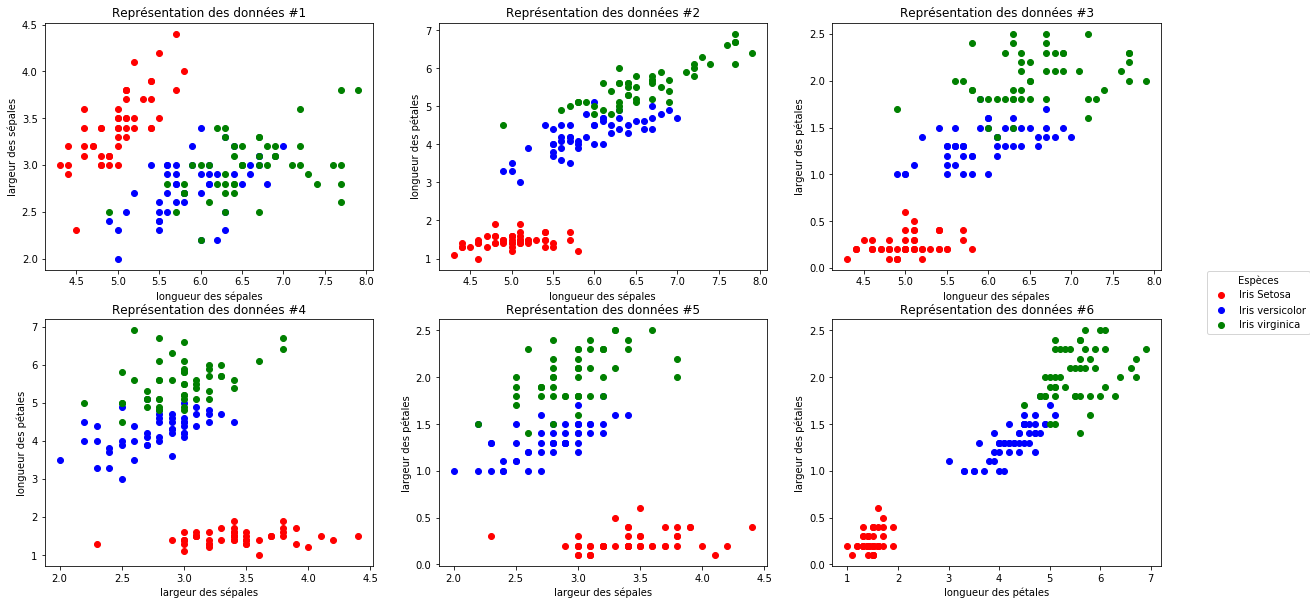

In [222]:
def extraction_abs_et_ord(indice1,indice2):
    """
    Entrée : deux entiers distinct entre 0 et 3
    Sortie : deux listes de flottants
    Extrait six listes de coordonnées à partir des données de la liste dataset
    """
    donnees_abscisses_setosa = [iris[indice1] for iris in dataset if iris[4] == 'Iris-setosa']
    donnees_ordonnees_setosa = [iris[indice2] for iris in dataset if iris[4] == 'Iris-setosa']
    donnees_abscisses_versicolor = [iris[indice1] for iris in dataset if iris[4] == 'Iris-versicolor']
    donnees_ordonnees_versicolor = [iris[indice2] for iris in dataset if iris[4] == 'Iris-versicolor']
    donnees_abscisses_virginica = [iris[indice1] for iris in dataset if iris[4] == 'Iris-virginica']
    donnees_ordonnees_virginica = [iris[indice2] for iris in dataset if iris[4] == 'Iris-virginica']
    return donnees_abscisses_setosa,donnees_ordonnees_setosa,donnees_abscisses_versicolor,donnees_ordonnees_versicolor, donnees_abscisses_virginica,donnees_ordonnees_virginica


donnees_abscisses_setosa,donnees_ordonnees_setosa,donnees_abscisses_versicolor,donnees_ordonnees_versicolor, donnees_abscisses_virginica,donnees_ordonnees_virginica = extraction_abs_et_ord(0,1)


# Instanciation du graphique
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Définition des légendes
point_labels = ["Iris Setosa", "Iris versicolor", "Iris virginica"]
axes_labels = ["longueur des sépales" , "largeur des sépales" , "longueur des pétales"  , "largeur des pétales"  ]
# Dictionnaire associant la position du graphique avec les caratères étudiés
correspondance = {(0,0):(0,1) , (0,1):(0,2) , (0,2):(0,3) , (1,0):(1,2) , (1,1):(1,3) , (1,2):(2,3)}

# Boucle permetant d'afficher les données en choisissant les axes
compteur = 0
for i in range(0,2):
    for j in range(0,3):
        compteur += 1
        # extraction des données
        indice1,indice2=correspondance[(i,j)]
        donnees_abscisses_setosa,donnees_ordonnees_setosa,donnees_abscisses_versicolor,donnees_ordonnees_versicolor, donnees_abscisses_virginica,donnees_ordonnees_virginica = extraction_abs_et_ord(indice1,indice2)
        plt1 = axs[i,j].plot(donnees_abscisses_setosa,donnees_ordonnees_setosa, 'ro',label='Iris setosa')
        plt2 = axs[i,j].plot(donnees_abscisses_versicolor,donnees_ordonnees_versicolor , 'bo',label='Iris versicolor')
        plt3 = axs[i,j].plot(donnees_abscisses_virginica,donnees_ordonnees_virginica , 'go',label='Iris virginica')  
        axs[i,j].set_xlabel(axes_labels[indice1])
        axs[i,j].set_ylabel(axes_labels[indice2])
        axs[i,j].set_title("Représentation des données #"+str(compteur))

fig.legend([plt1,plt2,plt3],     # The line objects
           labels=point_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Espèces"  # Title for the legend
           )    

plt.show()

<div class = "alert alert-warning">

#### Exercice 3

1. Une des espèce vous parraît-elle plus facile à distinguer des autres ? Si oui, laquelle et pourquoi ?
2. La représentation des données #1 est-elle la plus adaptée pour faire des prédictions ? Si non, lesquelles sont plus pertinentes ?
3. Pensez-vous que l'algorithme des plus proches voisins va fonctionner ?

#### Réponses :
1. Les iris Setosa sont plus facile à distinguer car les points rouges sont assez éloignés des autres.
2. Les points ne sont pas assez espacés les uns des autres, dans la représentation #6 les points sont plutôt éloignés.
3. L'algorithme devrait fonctionner mais une plante dont les caractéristiques sont situées à la frontière entre versicolor et virginica sera peut être mal étiquetée.

## Fonctionnement de l'algorithme

Flora se promène dans la nature et trouve deux iris dont elle mesure les pétales et sépales (ceci est réellement arrivé bien sûr !)  
Elle trouve les dimensions suivantes :

|             | largeur des sépales | longueur des sépales  |  largeur des pétales | longueur des pétales  |
|:-----------:|----------|----------|----------|----------|
| Iris 1 |  6 | 3.7  | 1.5  | 0.7|
| Iris 2 |  6.5 | 3.1  | 5  | 1.2  |

Les 2 iris inconnus sont placés dans les représentations graphiques ci-dessous.


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


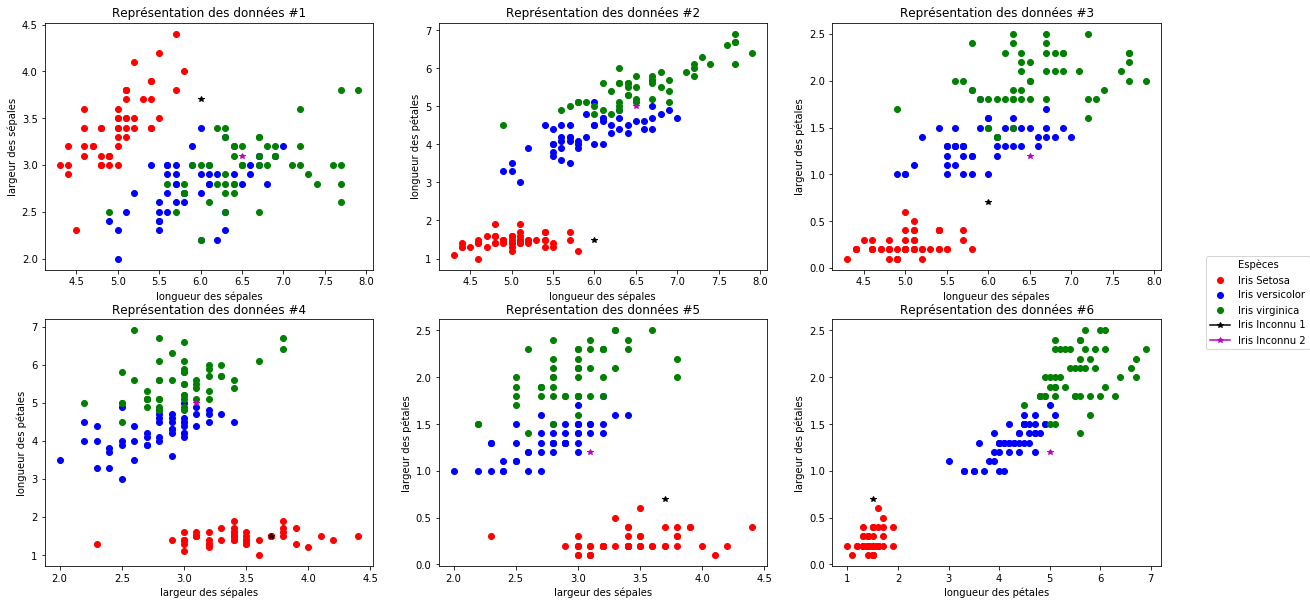

In [223]:
# Instanciation du graphique
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
# Définition des légendes
point_labels = ["Iris Setosa", "Iris versicolor", "Iris virginica", "Iris Inconnu 1","Iris Inconnu 2"]
axes_labels = ["longueur des sépales" , "largeur des sépales" , "longueur des pétales"  , "largeur des pétales"  ]
# Dictionnaire associant la position du graphique avec les caratères étudiés
correspondance = {(0,0):(0,1) , (0,1):(0,2) , (0,2):(0,3) , (1,0):(1,2) , (1,1):(1,3) , (1,2):(2,3)}
iris1= [6,3.7,1.5,0.7,'inconnu 1']
iris2= [6.5, 3.1, 5, 1.2, 'inconnu 2']

# Boucle permetant d'afficher les données en choisissant les axes
compteur = 0
for i in range(0,2):
    for j in range(0,3):
        compteur += 1
        # extraction des données
        indice1,indice2=correspondance[(i,j)]
        donnees_abscisses_setosa,donnees_ordonnees_setosa,donnees_abscisses_versicolor,donnees_ordonnees_versicolor, donnees_abscisses_virginica,donnees_ordonnees_virginica = extraction_abs_et_ord(indice1,indice2)
        plt1 = axs[i,j].plot(donnees_abscisses_setosa,donnees_ordonnees_setosa, 'ro',label='Iris setosa')
        plt2 = axs[i,j].plot(donnees_abscisses_versicolor,donnees_ordonnees_versicolor , 'bo',label='Iris versicolor')
        plt3 = axs[i,j].plot(donnees_abscisses_virginica,donnees_ordonnees_virginica , 'go',label='Iris virginica')  
        plt4 = axs[i,j].plot(iris1[indice1],iris1[indice2] , marker = '*', color='black',label='Iris inconnu 1') 
        plt5 = axs[i,j].plot(iris2[indice1],iris2[indice2] , marker = '*', color='m',label='Iris inconnu 2')  
        axs[i,j].set_xlabel(axes_labels[indice1])
        axs[i,j].set_ylabel(axes_labels[indice2])
        axs[i,j].set_title("Représentation des données #"+str(compteur))

fig.legend([plt1,plt2,plt3,plt4,plt5],     # The line objects
           labels=point_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Espèces"  # Title for the legend
           )    

plt.show()

<div class = "alert alert-warning">
    
#### Exercice 4
1. Selon vous, quelles sont les espèces de ces deux iris ? Justifiez votre choix.
2. Expliquer pourquoi la classification de l'iris 2 est plus délicate.

#### Réponses :
1. L'iris 1 est certainement de l'espèce Setosa, il est très proche du groupe des points rouges.
L'iris 2 est semble-t-il de l'espèce versicolor mais cela est moins évident car il est aussi assez proche des iris virginica.
2. Si l'on observe les graphiques 1 et 2 , l'iris 2 semble plus proche des versicolor alors que dans les autres graphiques il semble plus proche des virginica.

## Fonctionnement de l'algorithme

Pour avoir une règle plus précise de décision, nous allons utliser l'algorithme des plus proches voisins.

On rappelle le principe de l’algorithme des k plus proches voisins :
1. On calcule les distances entre la donnée et chaque donnée appartenant aux données d’apprentissage.
2. On retient les k données les plus proches de la nouvelle donnée.
3. On attribue à la nouvelle donnée l’étiquette la plus fréquente parmi les k données les plus proches.

Voici une réprésentation en 2D de ce jeu de données :
<img src='Images/graph0.png' style='float:right;' width=350>
* En abscisse : la longueur des pétales
* En ordonnée : la largeur des pétales

<img src='Images/graph1.png' style='float:right;' width=350>
On trouve un nouvel iris dont dont la longueur des pétales est 2 cm et la largeur 0,5 cm.

En plaçant le point de coordonnées $(2; 0,5)$, on constate qu'il y a de fortes chances que cet iris soit "iris-setosa"

<img src='Images/graph2.png' style='float:right;' width=350>
On trouve un nouvel iris dont dont la longueur des pétales est 2,5 cm et la largeur 0,75 cm.

En plaçant le point de coordonnées $(2,5; 0,75)$, on constate qu'il est plus difficile de prendre une décision.

C'est l'algorithme des k plus proches voisins qui va prendre la décision.

<img src='Images/graph3.png' style='float:right;' width=350>
La valeur de $k$ est le nombre de plus proches voisins(en terme de distance) avec lesquels le nouvel iris sera comparé. 

Dans l'exemple ci-contre, $k=3$, les trois plus proches voisins sont indiqués par des flèches.

Parmi ces trois voisins, deux sont étiquettés "setosa" et un seul est étiquetté "versicolor".

L'algorithme des 3 plus proches voisins choisira d'étiquetter ce nouvel iris comme "setosa".

#### Rappel avant de continuer :
* La distance dont il s'agit ici est la distance euclidienne dans un repère orthonormé entre deux points $A(x_{A};y_{A})$ et $B(x_{B};y_{B})$ :



<center> $AB=\sqrt{(x_{B}-x_{A})²+(y_{B}-y_{A})²}$ </center>

* Cette formule ce généralise en dimension supérieure de la façon suivante : 


<center> $AB=\sqrt{(x_{B}-x_{A})²+(y_{B}-y_{A})²+(z_{B}-z_{A})² + ...}$ </center>


## Programmation de l'algorithme

### Calculer la distance d'un point à chacun des points du dataset.

<div class = "alert alert-warning">
    
#### Exercice 5 :

Compléter la fonction ci-dessous. Elle doit vérifier les containtes suivantes :

- deux paramètres en entrée : deux listes ayant comme paramètres longueur_sepale, largeur_sepale, longueur_petale, largeur_petale comme ceux présents dans table_iris
- renvoie la distance **arrondie à trois décimales** entre ces deux iris en prenant en compte les valeurs de ces quatre champs.
 
Deux assertions qui doivent être vérifiées par votre fonction sont données ensuite.
 
**Rappels :**     
      
- On utilisera `sqrt` du module `math` pour calculer la racine carrée et `**` pour mettre au carré.

- On utilisera `round(x, 3)` pour arrondir un nombre `x` en ne gardant que trois décimales.


In [224]:
def calcul_distance(irisA,irisB):
    """
    Entrée : 2 iris avec 4 variables prédictrices
    Sortie : la distance (euclidienne) entre ces deux iris arrondie à 3 décimales
    """
    somme = 0
    for indice in range(4):
        somme += (irisB[indice] - irisA[indice])**2
    return round(sqrt(somme),3)

In [225]:
# Tests pour vérifier votre fonction calcul_distance
irisA , irisB =dataset[0] , dataset[1]
assert calcul_distance(irisA , irisB ) == 0.539
irisA , irisB =dataset[2] , dataset[3]
assert calcul_distance(irisA , irisB ) == 0.245

<div class = "alert alert-warning">

#### Exercice 6 :
    
Maintenant, pour une nouvelle fleur, il va falloir calculer les distances entre chaque iris du jeu de donnée et la nouvelle fleur.  
Pour cela, nous allons écrire une fonction qui ayant :
- en entrée : 
    - une liste correspondant à la nouvelle fleur 
    - le jeu de données , dans notre exemple c'est `dataset`
- en sortie : une copie du jeu de donnée avec un nouveau champ pour chaque iris correspondant à la distance de cet iris avec la nouvelle fleur.
    
**Remarques :**
- Pour copier une liste nommée `liste_originale` dans une liste nommée `liste_copiee`, on peut utliser la commande `liste_copiee = liste_originale[:]`. Ce procédé permet de garder la liste orginale intacte et de procéder à des modification sur la copie.



In [226]:
def distances_dataset(nouvel_iris,datas):
    dataset_avec_distances = []
    for iris in datas:
        distance = calcul_distance(nouvel_iris,iris)
        copie_iris = iris[:]
        copie_iris.append(distance)
        dataset_avec_distances.append(copie_iris)
    return dataset_avec_distances
        
        

In [227]:
iris1= [6,3.7,1.5,0.7,'inconnu 1']
iris2= [6.5, 3.1, 5, 1.2, 'inconnu 2']
distances_iris1 = distances_dataset(iris1,dataset)
distances_iris2 = distances_dataset(iris2,dataset)

La suite va consister à trier la liste obtenue à l'étape précédente par ordre croissant de distance par rapport à la nouvelle fleur.  
Ensuite il va falloir extraire les k plus proches voisins.

<div class = "alert alert-warning">

#### Exercice 7 :
Pour cela, nous allons écrire une fonction qui ayant :
- en entrée : 
    - une entier k (le nombre de plus proches voisins) 
    - le jeu de données , dans notre exemple c'est `dataset`, avec le champs distance (obtenu à l'étape précédente)
- en sortie : La liste des étiquettes des k plus proches voisins
    
**Aide :**
    La fonction `sorted` permet de faire un tri 'en place' (la liste initiale est remplacée par la liste triée) en fonction d'un des champs d'une liste.  
    `sorted(liste, key=lambda liste: liste[2]) ` permet de trier la liste en fonction du champs d'indice 2.

In [341]:
def extraire_proches_voisins(k,liste_distance):
    liste_k_voisins = []
    distances_triees = sorted(liste_distance, key=lambda liste: liste[5]) 
    for indice in range(k):
        liste_k_voisins.append(distances_triees[indice][4])
    return liste_k_voisins

In [342]:
# Test de la fonction extraire_proches_voisins

assert extraire_proches_voisins(3,distances_iris2) == ['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica']
assert extraire_proches_voisins(5,distances_iris1) == ['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']

<div class = "alert alert-warning">

#### Exercice 8 :
    
Ensuite il faut créer une fonction qui permet de déterminer l'étiquette majoritaire dans la liste des k plus proches voisins.

Compléter la fonction `element_majoritaire(etiquettes)` : 
* Entrées : 
  * La liste `etiquettes`
* Sortie: l'élément majoritaire dans la liste `etiquettes`  


In [349]:
def element_majoritaire(etiquettes):
    # elements est le dictionnaire des etiquettes sans doublons. La valeur associée à chaque clé est par défaut 0.
    elements = {element:0 for element in set(etiquettes)}
    # Compléter la ligne suivant pour que la valeur de chaque clé soit le nombre de fois où la clé apparait dans la liste etiquette
    for cle in elements:
        elements[cle] = etiquettes.count(cle)
    # Ensuite, à partir du dictionnaire précédent, trouver l'élément majoritaire
    max = 0
    element_majoritaire = ''
    for cle,valeur in elements.items():
        if valeur>max:
            max = valeur
            element_majoritaire = cle
    return element_majoritaire


In [350]:
#Des tests .
assert element_majoritaire(['alice','bob','alice','alice','bob','alice','alice','bob','charly']) == 'alice'
assert element_majoritaire(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica']) == 'Iris-versicolor'

<div class = "alert alert-warning">

#### Exercice 9 :
    
Intégrez tout ce qui précdède dans une unique fonction `k_plus_proches_voisins` qui prend en paramètres :  
    
- un nombre entier `k`,  
    
- une table d'iris étiquetés `table_iris`,  

- et un iris non étiqueté `nouvel_iris` 
    
et renvoie l'étiquette de `iris_a_etiqueter` obtenue selon l'algorithme des k plus proches voisins.

In [353]:
def k_plus_proches_voisins(k,nouvel_iris,datas):
    distances = distances_dataset(nouvel_iris,dataset)
    voisins = extraire_proches_voisins(k,distances)
    etiquette = element_majoritaire(voisins)
    return etiquette

<div class = "alert alert-warning">

#### Exercice 10 :
En déduire une prédiction pour chacun des deux iris inconnus de l'exercice 4 et vérifier la cohérence avec vos réponses.

In [356]:
iris1= [6,3.7,1.5,0.7,'inconnu 1']
iris2= [6.5, 3.1, 5, 1.2, 'inconnu 2']

print(k_plus_proches_voisins(3,iris1,dataset))
print(k_plus_proches_voisins(3,iris2,dataset))

Iris-setosa
Iris-versicolor


## Tester la fiabilité de cet algorithme.

Pour entraîner ou tester un algorithme d'apprentissage automatique, une technique classique est de partager le jeu de données en deux parties :
- un jeu de données d'apprentissage, qui sert à construire le modèle
- un jeu de test qui va servir à tester notre modèle.

Dans le jeu de test, nous connaissons les étiquettes "réelles", nous pouvons donc utiliser notre modèle sur ce jeu de donnée 'de test' pour prédire des étiquettes.  
Ensuite, en comparant les étiquettes prédites avec les étiquettes 'réelles', nous pouvons compter les erreurs faites par le modèle pour évaluer celui-ci.  
Dans le cas des k plus proches voisins nous pouvons ainsi évaluer le poucentage d'erreurs en fonction de la valeur de k qui est choisie.



<div class = "alert alert-warning">

#### Exercice 11 :
    
Créer une fonction qui permet de séparer le jeu de données en deux jeux apprentissage/test.

Compléter la fonction `creation_jeux` : 
* Entrées : 
  * le jeux de données : une liste
  * pourcentage_test , un flotant entre 0 et 100 qui représente le % de données consacrées aux tests
* Sortie: deux jeux apprentissage/test - 2 listes


[0.0, 3.333333333333332, 6.666666666666664, 6.666666666666664, 6.666666666666664, 3.333333333333332, 3.333333333333332, 6.666666666666664, 3.333333333333332, 6.666666666666664, 3.333333333333332]


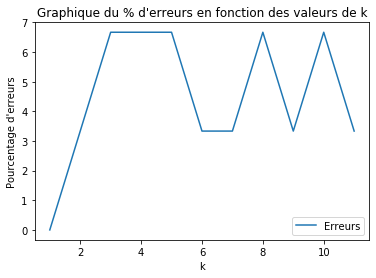

In [332]:
# Jeu Apprentissage / Test
#Mélange des données
def creation_jeux(dataset,pourcentage_test):
    shuffle(dataset)
    nbe_test = int(pourcentage_test*len(dataset)/100)
    jeu_test = dataset[0:nbe_test]
    jeu_apprentissage = dataset[nbe_test:]
    return jeu_apprentissage,jeu_test


jeu_apprentissage,jeu_test = creation_jeux(dataset,20)






<div class = "alert alert-warning">

#### Exercice 12 :
    
Créer une fonction qui permet de séparer le jeu de données en deux jeux apprentissage/test.

Compléter la fonction `eval_erreurs` : 
* Entrées : 
  * le jeux d'apprentissage : une liste
  * le jeux de tests : une liste    
  * k un entier supérieur ou égal à 1
* Sortie: le pourcentage d'erreurs réalisés par l'algorithme sur le jeu de test (en se servant du jeu d'apprentissage comme jeu de données)


[0.0, 3.333333333333332, 6.666666666666664, 6.666666666666664, 6.666666666666664, 3.333333333333332, 3.333333333333332, 6.666666666666664, 3.333333333333332, 6.666666666666664, 3.333333333333332]


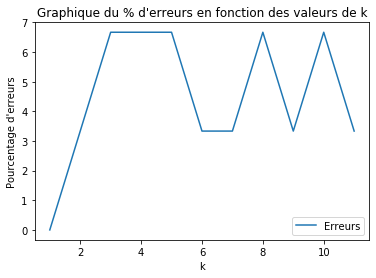

In [359]:
def eval_erreurs(jeu_apprentissage,jeu_test,k):
    total,erreur = 0,0
    for iris in jeu_test:
        prediction = k_plus_proches_voisins(k,iris,jeu_apprentissage)
        total +=1
        if prediction != iris[4]:
            erreur += 1
    return erreur/total*100


# Ci-dessous, 100 itérations sont effectués pour calculer la moyenne du nombre d'erreurs pour chaque valeur de k
# Ensuite un graphique permet de visualiser le pourcentage d'erreurs en fonction de la valeur de k.
# Comme la génération de la liste `erreurs` est en partie aléatoire, vos graphiques seront différents à chaque éxécution de la cellule.
# Mais cela donne une idée de l'influence du paramètre k.
# Attention, l'éxécution de cette cellule peut prendre du temps.

erreurs = []
for k in range(1,12):
    erreur = 0
    for i in range(100):
        erreur += eval_erreurs(jeu_apprentissage,jeu_test,k)
    moyenne = erreur/100
    erreurs.append(moyenne)

# erreurs = [eval_erreurs(jeu_apprentissage,jeu_test,k) for k in range(1,12)]

print(erreurs)

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(list(range(1,12)), erreurs, label='Erreurs')  # Plot some data on the axes.
ax.set_xlabel('k')  # Add an x-label to the axes.
ax.set_ylabel("Pourcentage d'erreurs")  # Add a y-label to the axes.
ax.set_title("Graphique du % d'erreurs en fonction des valeurs de k")  # Add a title to the axes.
ax.legend()  # Add a legend.